In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from chinese_english_lookup import Dictionary
from pyvis import network as net
import re

In [3]:
from cjklib.reading import ReadingFactory

ModuleNotFoundError: No module named 'cjklib'

In [36]:
numeration_to_accent = {
    '1': 'āēīōū',
    '2': 'áéíóú',
    '3': 'ǎěǐǒǔ',
    '4': 'àèìòù'
    }
pinyin_pattern = re.compile(r'([a-zA-Z]+)(\d)')

def replace_pinyin_numeration(match):
    pinyin, numeration = match.groups()
    accent = numeration_to_accent[numeration]
    print(pinyin," ",numeration," ",accent," ",match.groups())#,pinyin.index("aeiou"))
    return f'{pinyin}{accent[pinyin.index("a")]}'



In [33]:
text="ma"


In [38]:
#print f'{pinyin}{accent[pinyin.index("aouei")]}'
text = 'ma1 hao3 nia3'
pinyin_pattern.sub(replace_pinyin_numeration, text)

ma   1   āēīōū   ('ma', '1')
hao   3   ǎěǐǒǔ   ('hao', '3')
nia   3   ǎěǐǒǔ   ('nia', '3')


'maē haoě niaǐ'

In [4]:
d = Dictionary()

# define a function to convert pinyin numeration to accented vowels
def convert_pinyin_numeration(text):
    # define a regular expression to match pinyin with numeration
    pinyin_pattern = re.compile(r'([a-zA-Z]+)(\d)')

    # define a dictionary of numeration to accent mappings
    numeration_to_accent = {
        '1': 'āáǎà',
        '2': 'ēéěè',
        '3': 'īíǐì',
        '4': 'ōóǒò',
        '5': 'ūúǔù',
        '6': 'üǘǚǜ'
    }

    # replace all occurrences of pinyin with numeration
    def replace_pinyin_numeration(match):
        pinyin, numeration = match.groups()
        accent = numeration_to_accent[numeration]
        return f'{pinyin}{accent[pinyin.index("aouei")]}'

    return pinyin_pattern.sub(replace_pinyin_numeration, text)

# example usage:
text = 'ni3 hao3 ma1'
converted_text = convert_pinyin_numeration(text)
print(converted_text) # should print 'nǐ hǎo ma'

ValueError: substring not found

## Chinese language graph

In [7]:
d = Dictionary()

In [4]:
# create a new empty directed graph
G = nx.DiGraph()

# open the file for reading
with open('chinese_data/small_twochars_wrods.txt') as f:
    # loop over each line in the file
    for line in f:
        # get the two letters on this line
        letter1, letter2 = line.strip()

        # add nodes and edge to the graph
        #G.add_node(letter1)
        #G.add_node(letter2)
        G.add_edge(letter1, letter2)

# print some information about the graph
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
#print(f'Connected components: {list(nx.strongly_connected_components(G))}')

Number of nodes: 768
Number of edges: 1000


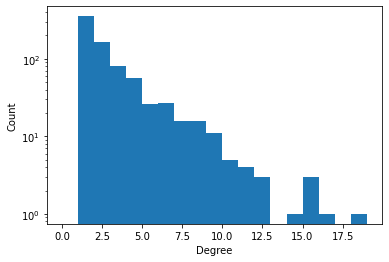

In [5]:
degrees = [deg for _, deg in G.degree()]
plt.hist(degrees, bins=range(max(degrees)+2))
plt.xlabel('Degree')
plt.ylabel('Count')
plt.yscale('log') # set y-axis scale to logarithmic
plt.show()

In [6]:
cc = nx.average_clustering(G)
# print the result
print(f'Clustering coefficient: {cc}')

Clustering coefficient: 0.010663718394838186


In [13]:
node = "生"
print(node," ",d.lookup(node)," " ,degree_dict[node])

生   生 | 生
【sheng1】 to be born; to give birth; life; to grow; raw; uncooked; student   9


In [11]:
# get the 20 nodes with the highest degree
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:100]

# print the top 20 nodes and their degrees
for node in top_nodes:
    print("hel ",node," ",d.lookup(node)," " ,degree_dict[node])


hel  大   大 | 大
1) 【da4】 big; huge; large; major; great; wide; deep; older (than); oldest; eldest; greatly; very much; (dialect) father; father's elder or younger brother
2) 【dai4】 see 大夫[dai4 fu5]   18
hel  人   人 | 人
【ren2】 man; person; people; CL:個|个[ge4],位[wei4]   16
hel  国   国 | 國
1) 【Guo2】 surname Guo
2) 【guo2】 country; nation; state; national; CL:個|个[ge4]   15
hel  有   有 | 有
【you3】 to have; there is; there are; to exist; to be   15
hel  不   不 | 不
【bu4】 (negative prefix); not; no   15
hel  成   成 | 成
1) 【Cheng2】 surname Cheng
2) 【cheng2】 to succeed; to finish; to complete; to accomplish; to become; to turn into; to be all right; OK!; one tenth   14
hel  业   业 | 業
1) 【Ye4】 surname Ye
2) 【ye4】 line of business; industry; occupation; job; employment; school studies; enterprise; property; (Buddhism) karma; deed; to engage in; already   12
hel  是   是 | 是
1) 【shi4】 is; are; am; yes; to be
2) 【shi4】 variant of 是[shi4]; (used in given names)   12
hel  一   一 | 一
【yi1】 one; 1; single; a (arti

In [9]:
# get the 20 nodes with the lowest degree
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict, key=degree_dict.get)[:100]

# print the top 20 nodes and their degrees
for node in top_nodes:
    print(node," ",d.lookup(node)," " ,degree_dict[node])


题   题 | 題
1) 【Ti2】 surname Ti
2) 【ti2】 topic; problem for discussion; exam question; subject; to inscribe; to mention; CL:個|个[ge4],道[dao4]   1
济   济 | 濟
1) 【Ji3】 used in place names associated with the Ji River 濟水|济水[Ji3 Shui3]; surname Ji
2) 【ji3】 only used in 濟濟|济济[ji3 ji3]
3) 【ji4】 to cross a river; to aid or relieve; to be of help   1
己   己 | 己
【ji3】 self; oneself; sixth of the ten Heavenly Stems 十天干[shi2 tian1 gan1]; sixth in order; letter "F" or Roman "VI" in list "A, B, C", or "I, II, III" etc; hexa   1
群   群 | 羣
1) 【qun2】 variant of 群[qun2]
2) 【qun2】 group; crowd; flock, herd, pack etc   1
没   没 | 沒
1) 【mei2】 (negative prefix for verbs); have not; not
2) 【mo4】 drowned; to end; to die; to inundate   1
府   府 | 府
【fu3】 seat of government; government repository (archive); official residence; mansion; presidential palace; (honorific) Your home; prefecture (from Tang to Qing times)   1
织   织 | 織
【zhi1】 to weave; to knit   1
干   干 | 乹
1) 【gan1】 old variant of 乾|干[gan1]
2) 【Gan1】 surna

In [8]:
from pyvis import network as net

In [11]:
nt = net.Network(height='500px', width='900px',notebook=True)
#nt = Network('500px', '1500px')
nt.from_nx(G)
nt.show('nx.html')